In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics 

In [6]:
car_dataset = pd.read_csv('car data.csv')

In [7]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car_dataset.shape

(301, 9)

In [10]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [15]:
print(car_dataset.Fuel_Type.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64


In [16]:
print(car_dataset.Seller_Type.value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64


In [17]:
print(car_dataset.Transmission.value_counts())

Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [20]:
car_dataset.replace({'Fuel_Type' : {"Petrol" : 0 , "Diesel" : 1 , "CNG" : 2} , 'Seller_Type' : {"Dealer" : 0 , "Individual" : 1} , 'Transmission' : {"Manual" : 0 , "Automatic" : 1}},inplace = True)

In [21]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [27]:
X = car_dataset.drop(columns =['Selling_Price' , 'Car_Name'] , axis =1 )
Y = car_dataset['Selling_Price']

In [29]:
print(X.shape , Y.shape)

(301, 7) (301,)


In [31]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.1 , random_state = 2)

In [33]:
lin_reg_model = LinearRegression()

lin_reg_model.fit(X_train , Y_train )

LinearRegression()

In [41]:
lin_reg_model_Trpred = lin_reg_model.predict(X_train)

lin_reg_model_Tepred = lin_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_train ,lin_reg_model_Trpred )

error_score2 = metrics.r2_score(Y_test ,lin_reg_model_Tepred )

print('R squared error in Train is :',error_score)

print('R squared error in Test is :',error_score2)

R squared error in Train is : 0.87994516604937
R squared error in Test is : 0.8365766715025409


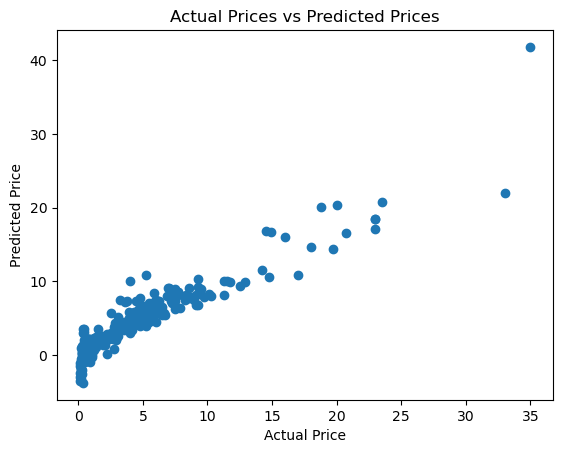

In [39]:
plt.scatter ( Y_train , lin_reg_model_Trpred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

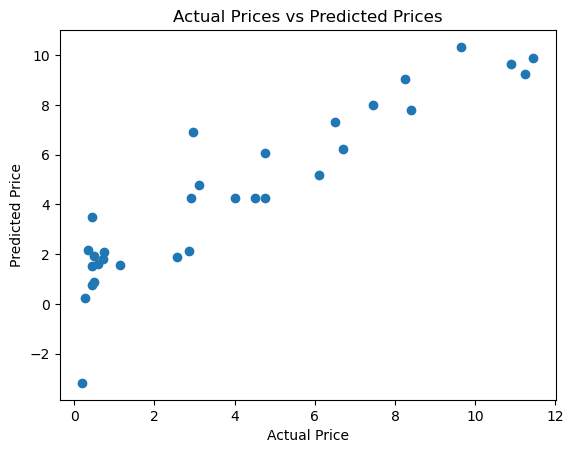

In [40]:
plt.scatter ( Y_test , lin_reg_model_Tepred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

R squared error in Train is : 0.8427856123435794
R squared error in Test is : 0.8709167941173195


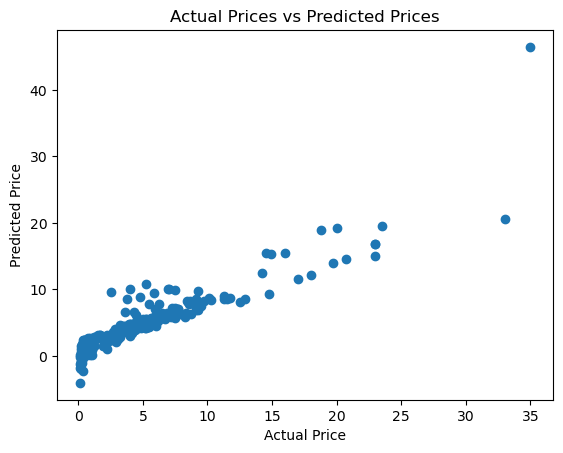

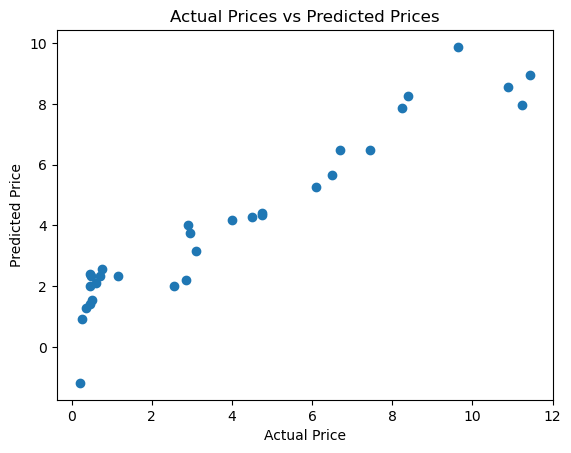

In [42]:
las_reg_model = Lasso()

las_reg_model.fit(X_train , Y_train )

las_reg_model_Trpred = las_reg_model.predict(X_train)

las_reg_model_Tepred = las_reg_model.predict(X_test)

error_score = metrics.r2_score(Y_train ,las_reg_model_Trpred )

error_score2 = metrics.r2_score(Y_test ,las_reg_model_Tepred )

print('R squared error in Train is :',error_score)

print('R squared error in Test is :',error_score2)

plt.scatter ( Y_train , las_reg_model_Trpred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()

plt.scatter ( Y_test , las_reg_model_Tepred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.show()



In [43]:
import joblib as jb 

jb.dump(lin_reg_model , 'CarPrice1.joblib')

['CarPrice.joblib']

In [44]:
jb.dump(las_reg_model , 'CarPrice2.joblib')

['CarPrice2.joblib']